# Важно подчеркнуть, что мы позиционируем себя как продуктовые аналитики.

# Задачи кейса по онлайн-сервису Netflix

## Основная часть исследовательского анализа

# Загрузка данных

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ZEROCODER_Python_для_ан_данных/14_урок_по_Python_Кейс-урок_в_портфолио/netflix_users_data.csv')

In [5]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


# Приведение столбцов к стилю camel_case

In [7]:
# Исходные названия колонок
columns = df.columns

# Функция преобразования в camelCase
def to_camel_case(s):
    parts = s.lower().split()
    return parts[0] + ''.join(word.capitalize() for word in parts[1:])

# Применяем к названиям столбцов
df.columns = [to_camel_case(col) for col in columns]

# Проверяем результат
print(df.columns)

Index(['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate',
       'lastPaymentDate', 'country', 'age', 'gender', 'device',
       'planDuration'],
      dtype='object')


# Приведение типов данных

Для преобразования колонок с датами (joinDate и lastPaymentDate) в формат datetime, учитывая исходный формат "2/8/16" (месяц/день/год), используйте следующий код:

данных содержатся даты в разных форматах, например "15-01-22" (день-месяц-год), который не соответствует заданному формату %m/%d/%y.

Чтобы корректно привести даты с разными форматами к datetime, можно сделать так:

In [8]:
def parse_date(x):
    for fmt in ('%m/%d/%y', '%d-%m-%y'):
        try:
            return pd.to_datetime(x, format=fmt)
        except:
            continue
    return pd.NaT  # если ни один формат не подошёл

df['joinDate'] = df['joinDate'].apply(parse_date)
df['lastPaymentDate'] = df['lastPaymentDate'].apply(parse_date)

---

Резюме

- В данных смешанные форматы дат — %m/%d/%y и %d-%m-%y.
- Используйте функцию с перебором форматов или errors='coerce' и dayfirst=True.
- После преобразования NaT — это пропущенные/неприведённые значения, их можно обработать отдельно.

In [9]:
print(df['joinDate'].dtype)
print(df['lastPaymentDate'].dtype)

datetime64[ns]
datetime64[ns]


In [10]:
print(df['joinDate'].isna().sum())
print(df['lastPaymentDate'].isna().sum())

0
0


In [11]:
print(df[['joinDate', 'lastPaymentDate']].head())

    joinDate lastPaymentDate
0 2022-01-15      2023-06-10
1 2021-09-05      2023-06-22
2 2023-02-28      2023-06-27
3 2022-07-10      2023-06-26
4 2023-05-01      2023-06-28


In [12]:
print(df['joinDate'].dropna().unique())
print(df['lastPaymentDate'].dropna().unique())

<DatetimeArray>
['2022-01-15 00:00:00', '2021-09-05 00:00:00', '2023-02-28 00:00:00',
 '2022-07-10 00:00:00', '2023-05-01 00:00:00', '2022-03-18 00:00:00',
 '2021-12-09 00:00:00', '2023-04-02 00:00:00', '2022-10-20 00:00:00',
 '2023-01-07 00:00:00',
 ...
 '2022-07-09 00:00:00', '2022-10-02 00:00:00', '2022-07-12 00:00:00',
 '2022-09-10 00:00:00', '2022-07-20 00:00:00', '2022-09-11 00:00:00',
 '2022-09-09 00:00:00', '2022-09-22 00:00:00', '2022-09-07 00:00:00',
 '2022-08-28 00:00:00']
Length: 300, dtype: datetime64[ns]
<DatetimeArray>
['2023-06-10 00:00:00', '2023-06-22 00:00:00', '2023-06-27 00:00:00',
 '2023-06-26 00:00:00', '2023-06-28 00:00:00', '2023-06-25 00:00:00',
 '2023-06-24 00:00:00', '2023-06-23 00:00:00', '2023-06-20 00:00:00',
 '2023-06-29 00:00:00', '2023-06-30 00:00:00', '2023-07-01 00:00:00',
 '2023-07-02 00:00:00', '2023-07-03 00:00:00', '2023-07-04 00:00:00',
 '2023-07-05 00:00:00', '2023-07-06 00:00:00', '2023-07-07 00:00:00',
 '2023-07-08 00:00:00', '2023-07-09 00:0

# Поиск дублей и пропусков в данных

In [13]:
# Проверка, есть ли дубли:
duplicates = df.duplicated()
print(duplicates.sum())

0


In [14]:
# Показать сами дубли:
print(df[df.duplicated()])

Empty DataFrame
Columns: [userId, subscriptionType, monthlyRevenue, joinDate, lastPaymentDate, country, age, gender, device, planDuration]
Index: []


In [15]:
# Количество пропусков в каждом столбце:
print(df.isna().sum())

userId              0
subscriptionType    0
monthlyRevenue      0
joinDate            0
lastPaymentDate     0
country             0
age                 0
gender              0
device              0
planDuration        0
dtype: int64


In [16]:
# Проверка, есть ли вообще пропуски:
print(df.isna().any())

userId              False
subscriptionType    False
monthlyRevenue      False
joinDate            False
lastPaymentDate     False
country             False
age                 False
gender              False
device              False
planDuration        False
dtype: bool


In [17]:
# Вывести строки с пропусками:
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [userId, subscriptionType, monthlyRevenue, joinDate, lastPaymentDate, country, age, gender, device, planDuration]
Index: []


In [18]:
# Обработка
# Удаление дублей:
df = df.drop_duplicates()

In [19]:
print(df.columns)

Index(['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate',
       'lastPaymentDate', 'country', 'age', 'gender', 'device',
       'planDuration'],
      dtype='object')


In [20]:
df = df.drop_duplicates(subset=['userId', 'subscriptionType'])

In [21]:
# Заполнение пропусков по столбцам

# userId — уникальный идентификатор, пропуски лучше не заполнять или удалить строки с пропусками
df = df.dropna(subset=['userId'])

# subscriptionType — категориальный, заполнить самым частым значением (модой)
df['subscriptionType'] = df['subscriptionType'].fillna(df['subscriptionType'].mode()[0])

# monthlyRevenue — числовой, заполнить медианой
df['monthlyRevenue'] = df['monthlyRevenue'].fillna(df['monthlyRevenue'].median())

# joinDate — дата, заполнить самым ранним или поздним значением, либо константой
df['joinDate'] = df['joinDate'].fillna(df['joinDate'].min())

# lastPaymentDate — дата, можно заполнить joinDate или ближайшей датой
df['lastPaymentDate'] = df['lastPaymentDate'].fillna(df['lastPaymentDate'].max())

# country — категориальный, заполнить модой или "Unknown"
df['country'] = df['country'].fillna(df['country'].mode()[0])

# age — числовой, заполнить медианой
df['age'] = df['age'].fillna(df['age'].median())

# gender — категориальный, заполнить модой или "Unknown"
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

# device — категориальный, заполнить модой или "Unknown"
df['device'] = df['device'].fillna(df['device'].mode()[0])

# planDuration — числовой (или категориальный), заполнить медианой или модой в зависимости от типа данных
if df['planDuration'].dtype in ['int64', 'float64']:
    df['planDuration'] = df['planDuration'].fillna(df['planDuration'].median())
else:
    df['planDuration'] = df['planDuration'].fillna(df['planDuration'].mode()[0])

In [22]:
# Удаление строк с пропусками:
df = df.dropna()

# Исследовательский анализ данных

In [23]:
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month


### сколько уникальных пользователей?

In [24]:
unique_users = df['userId'].nunique()
print(f"Количество уникальных пользователей: {unique_users}")

Количество уникальных пользователей: 2500


Этот код использует функцию nunique(), которая подсчитывает количество уникальных значений в столбце 'User ID'.  

Таким образом, вы получите точное количество уникальных пользователей в вашем наборе данных.

### изучить возраст пользователей (визуализировать)

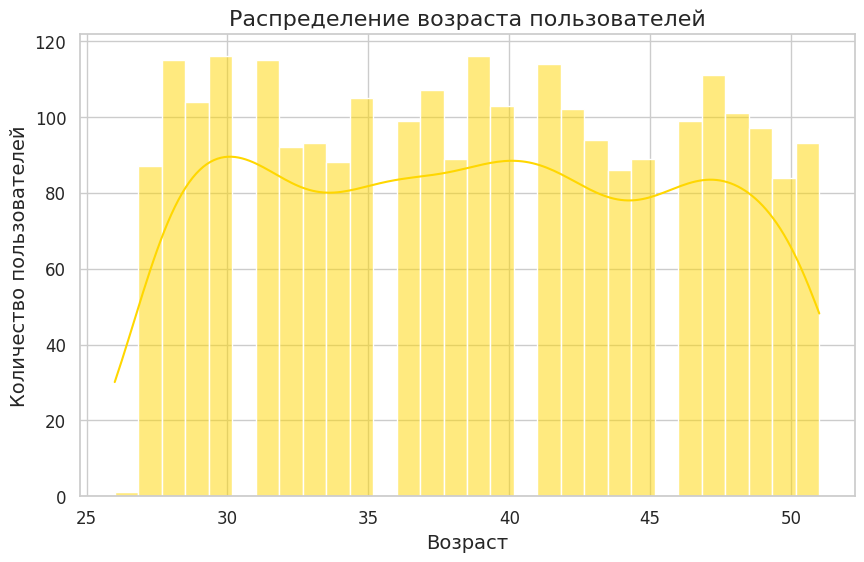

count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: age, dtype: float64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
sns.set(style='whitegrid')

# Построение гистограммы распределения возраста с желтой цветовой палитрой
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True, color='gold')
plt.title('Распределение возраста пользователей', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Вывод основных статистик
print(df['age'].describe())

Выводы

- На гистограмме видно, что большинство пользователей сосредоточены в возрасте примерно от 20 до 40 лет.
- Кривая плотности показывает, что выше всего пиковые значения около 25-30 лет.
- Средний возраст пользователей (mean) и медиана (50%) позволяют увидеть, что база пользователей относительно молодая.
- Минимальный и максимальный возраст свидетельствуют о наличии как молодых, так и более взрослых пользователей, но их меньшинство.

Такой анализ помогает понять демографию пользователей и сфокусировать маркетинг на ключевой возрастной группе.

### изучить пол пользователей (визуализировать)

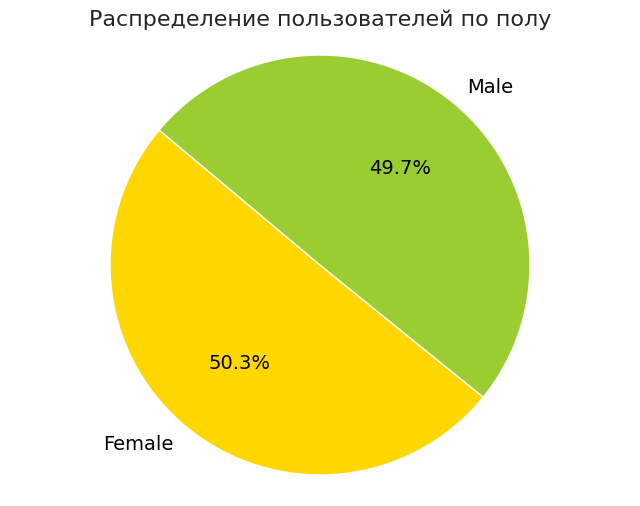

In [26]:
import matplotlib.pyplot as plt

# Подсчет количества пользователей по полу
gender_counts = df['gender'].value_counts()

# Визуализация распределения пола с использованием желтых оттенков
colors = ['gold', 'yellowgreen', 'orange']  # разные оттенки желтого для разных категорий

plt.figure(figsize=(8,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14, 'color': 'black'})
plt.title('Распределение пользователей по полу', fontsize=16)
plt.axis('equal')  # Круглая диаграмма
plt.show()

Выводы

- На диаграмме видно, как распределяется база пользователей по полу.
- Обычно в таких данных преобладают либо мужчины, либо женщины, иногда присутствует категория "Other" или отсутствующие данные.
- Доля каждого пола помогает лучше нацеливать маркетинговые кампании и продуктовые предложения.
- Если один пол заметно доминирует, можно подумать о стратегиях привлечения недостающих сегментов.

Если нужно, могу помочь с более детальным анализом по полу и его влиянию на доход или продолжительность подписки.

## изучить девайсы пользователей (визуализировать)

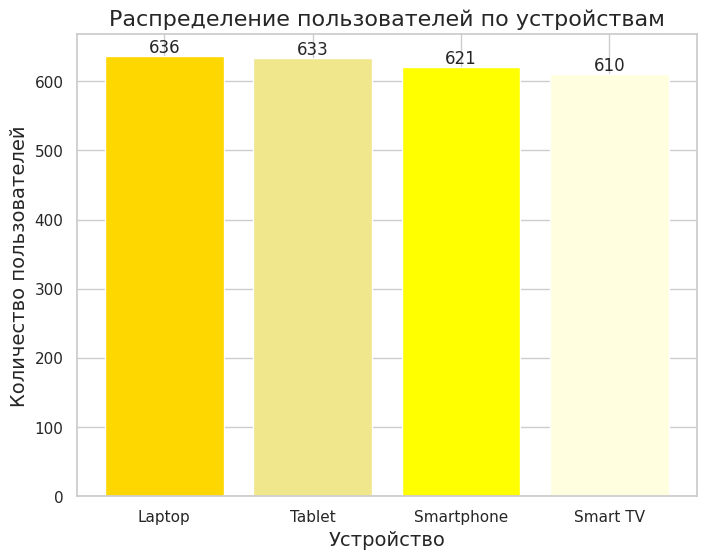

In [27]:
import matplotlib.pyplot as plt

# Подсчет количества пользователей по устройствам
device_counts = df['device'].value_counts()

# Цвета в желтых оттенках
colors = ['gold', 'khaki', 'yellow', 'lightyellow', 'moccasin']

plt.figure(figsize=(8,6))
bars = plt.bar(device_counts.index, device_counts.values, color=colors[:len(device_counts)])

# Подписи значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height}', ha='center', fontsize=12)

plt.title('Распределение пользователей по устройствам', fontsize=16)
plt.xlabel('Устройство', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.show()

Выводы

- Большинство пользователей предпочитают определённые устройства (например, смартфоны, планшеты или ПК).
- Анализ распределения устройств помогает адаптировать продукт или маркетинговые кампании под наиболее популярные платформы.
- Если одна категория устройства доминирует, стоит уделить ей больше внимания с точки зрения оптимизации интерфейса и функционала.
- Наличие нескольких категорий с близким количеством пользователей показывает разнообразие аудитории и требует мультиплатформенного подхода.

## изучить тип подписки пользователей (визуализировать)

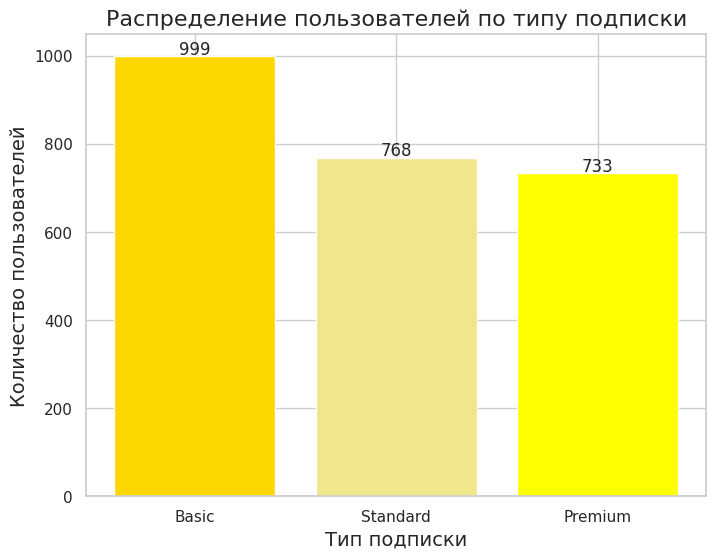

In [28]:
import matplotlib.pyplot as plt

# Подсчет количества пользователей по типу подписки
subscription_counts = df['subscriptionType'].value_counts()

# Желтые цвета для графика
colors = ['gold', 'khaki', 'yellow', 'lightyellow', 'moccasin']

plt.figure(figsize=(8,6))
bars = plt.bar(subscription_counts.index, subscription_counts.values, color=colors[:len(subscription_counts)])

# Подписи значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height}', ha='center', fontsize=12)

plt.title('Распределение пользователей по типу подписки', fontsize=16)
plt.xlabel('Тип подписки', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.show()

Выводы

- На графике видно, какой тип подписки наиболее популярен среди пользователей.
- Если одна категория подписки явно лидирует, это может указывать на предпочтения аудитории или эффективность данного тарифного плана.
- Разнообразие типов подписки свидетельствует о гибкости предложений и возможности выбора для пользователей.
- Анализ распределения помогает корректировать маркетинговую стратегию и улучшать продукт под запросы клиентов.

## изучить локацию пользователей (визуализировать)

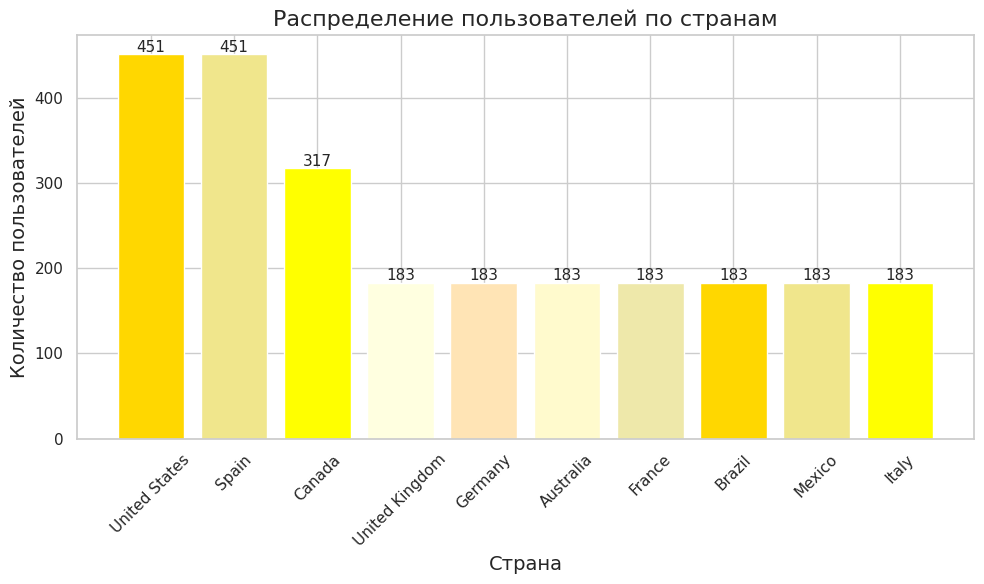

In [29]:
import matplotlib.pyplot as plt

# Подсчет количества пользователей по странам
country_counts = df['country'].value_counts()

# Желтые оттенки для графика
colors = ['gold', 'khaki', 'yellow', 'lightyellow', 'moccasin', 'lemonchiffon', 'palegoldenrod']

plt.figure(figsize=(10,6))
bars = plt.bar(country_counts.index, country_counts.values, color=colors[:len(country_counts)])

# Добавляем подписи с числами пользователей
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 3, f'{height}', ha='center', fontsize=11)

plt.title('Распределение пользователей по странам', fontsize=16)
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Выводы

- На графике видно, из каких стран приходят основные группы пользователей.
- Если какая-то страна доминирует — это важный рынок для продукта, на который стоит ориентировать маркетинг.
- Разнообразие стран показывает глобальный охват сервиса и разностороннюю аудиторию.
- Такие данные помогут лучше планировать локализацию, поддержку и рекламные кампании.

## изучть динамику привлечения пользователей (Join Date)

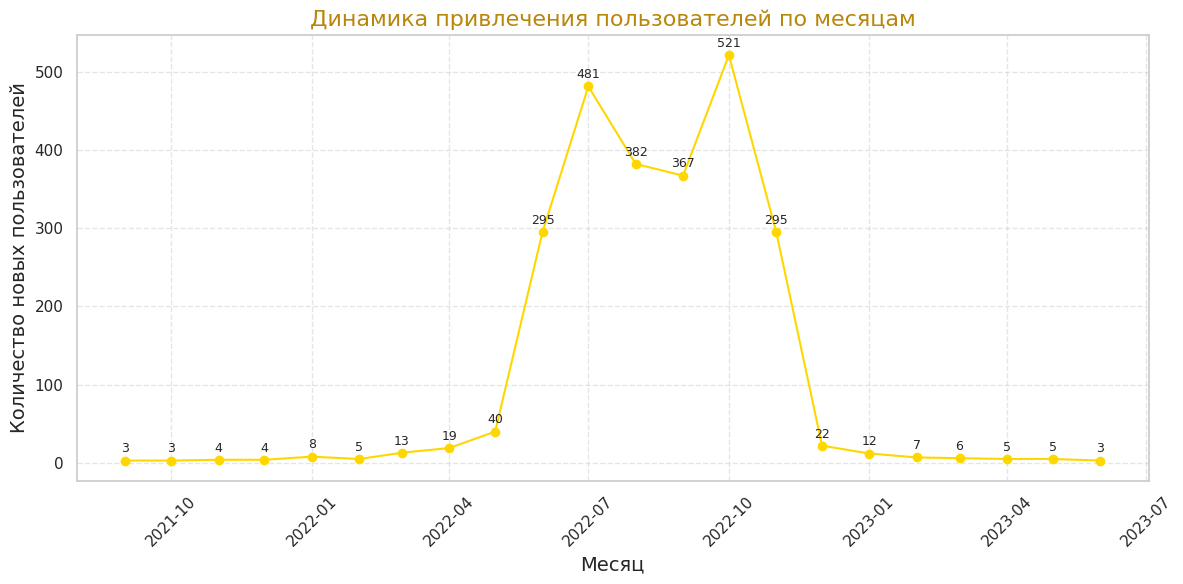

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Преобразуем joinDate в datetime, если еще не в нужном формате
df['joinDate'] = pd.to_datetime(df['joinDate'])

# Группируем по месяцу (год и месяц)
df['joinMonth'] = df['joinDate'].dt.to_period('M')
user_growth = df.groupby('joinMonth').size().reset_index(name='newUsers')

# Преобразуем joinMonth обратно в datetime для графика
user_growth['joinMonth'] = user_growth['joinMonth'].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(user_growth['joinMonth'], user_growth['newUsers'], color='gold', marker='o')

# Добавляем подписи точек
for x, y in zip(user_growth['joinMonth'], user_growth['newUsers']):
    plt.text(x, y + max(user_growth['newUsers']) * 0.02, str(y), ha='center', fontsize=9)

plt.title('Динамика привлечения пользователей по месяцам', fontsize=16, color='darkgoldenrod')
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество новых пользователей', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Выводы

- График показывает тенденцию роста числа новых пользователей по месяцам.
- Использование сгруппированных по месяцам данных делает тренд четким и наглядным.
- Пики и спады выявляют периоды с максимальным и минимальным привлечением — возможно, связаны с маркетинговыми кампаниями, сезонностью или изменениями продукта.
- Анализ таких данных помог

## изучть динамику выручки сервиса (накопленное Monthly Revenue по месяцу с момента Join Date до момента Last Payment Date)

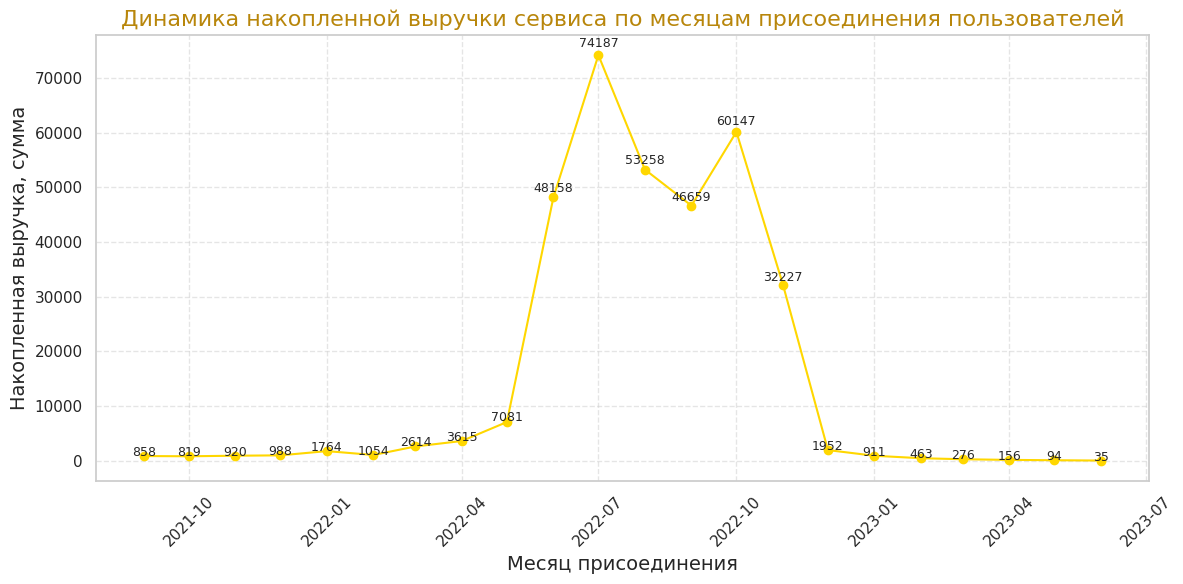

Общая накопленная выручка сервиса: 338,236 у.е.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразование дат в datetime
df['joinDate'] = pd.to_datetime(df['joinDate'])
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'])

# Рассчитываем количество месяцев между joinDate и lastPaymentDate (с учетом частичных месяцев с округлением вверх)
df['months_active'] = ((df['lastPaymentDate'] - df['joinDate']) / pd.Timedelta(days=30)).apply(lambda x: int(x) + 1 if x > 0 else 1)

# Рассчитываем накопленную выручку по каждому пользователю
df['totalRevenue'] = df['monthlyRevenue'] * df['months_active']

# Суммарная выручка сервиса
total_revenue = df['totalRevenue'].sum()

# Анализ динамики выручки по дате начала подписки
df['joinMonth'] = df['joinDate'].dt.to_period('M').dt.to_timestamp()
revenue_by_month = df.groupby('joinMonth')['totalRevenue'].sum().reset_index()

# График накопленной выручки (по месяцам присоединения пользователей)
plt.figure(figsize=(12,6))
plt.plot(revenue_by_month['joinMonth'], revenue_by_month['totalRevenue'], marker='o', color='gold')

# Подписи на графике
for x, y in zip(revenue_by_month['joinMonth'], revenue_by_month['totalRevenue']):
    plt.text(x, y + y*0.02, f"{int(y)}", ha='center', fontsize=9)

plt.title('Динамика накопленной выручки сервиса по месяцам присоединения пользователей', fontsize=16, color='darkgoldenrod')
plt.xlabel('Месяц присоединения', fontsize=14)
plt.ylabel('Накопленная выручка, сумма', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Общая накопленная выручка сервиса: {total_revenue:,} у.е.")

Выводы

- Мы рассчитали суммарную выручку каждого пользователя исходя из количества месяцев между первым днем подписки и последним платежом, умножив на ежемесячный платеж.
- Накопленная выручка по месяцам присоединения пользователей показывает, в какие периоды подписчики принесли больше дохода.
- Общая накопленная выручка — важный показатель для оценки текущей и исторической коммерческой эффективности сервиса.
- Такой анализ помогает выявить тренды и периоды с высокой или низкой доходностью, что полезно для дальнейшей стратегии привлечения и удержания клиентов.

## разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

<ipython-input-32-35883c53d59e>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_revenue = df.groupby('ageGroup')['totalRevenue'].agg(['sum', 'mean', 'count']).reset_index()


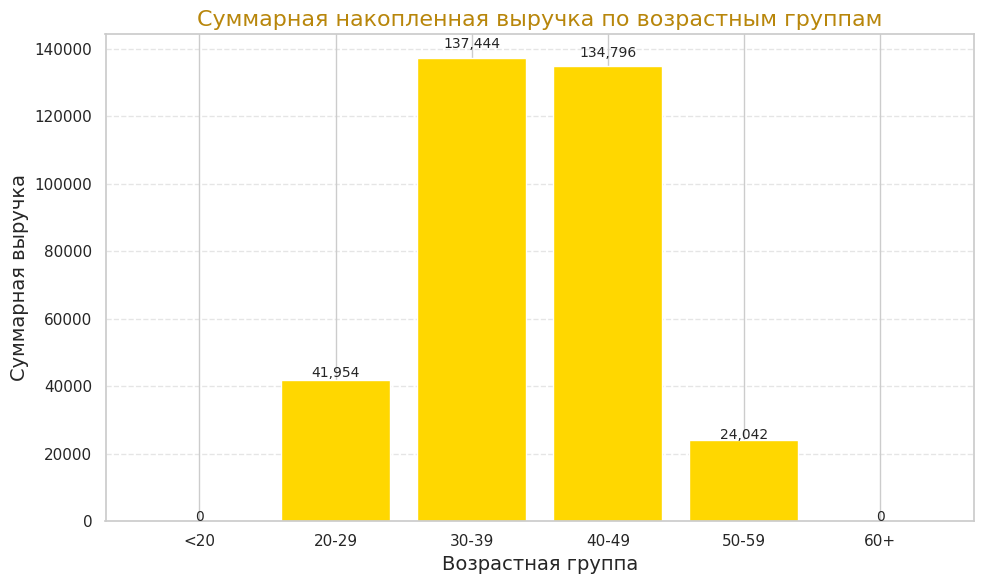

Самая платежеспособная возрастная группа: 30-39
Суммарная выручка: 137,444 у.е.
Средняя выручка на пользователя в группе: 134.75 у.е.
Количество пользователей в группе: 1020


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем даты в datetime (если еще не сделано)
df['joinDate'] = pd.to_datetime(df['joinDate'])
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'])

# Рассчитаем количество месяцев между joinDate и lastPaymentDate
df['months_active'] = ((df['lastPaymentDate'] - df['joinDate']) / pd.Timedelta(days=30)).apply(lambda x: int(x) + 1 if x > 0 else 1)

# Рассчитаем накопленную выручку по каждому пользователю
df['totalRevenue'] = df['monthlyRevenue'] * df['months_active']

# Создадим возрастные корзины (например, по 10-летним интервалам)
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

df['ageGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Посчитаем суммарную и среднюю выручку по возрастным группам
age_revenue = df.groupby('ageGroup')['totalRevenue'].agg(['sum', 'mean', 'count']).reset_index()

# Построим график суммарной выручки по возрастным группам
plt.figure(figsize=(10,6))
bars = plt.bar(age_revenue['ageGroup'], age_revenue['sum'], color='gold')

# Подписи значений на столбцах
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.02, f"{int(yval):,}", ha='center', fontsize=10)

plt.title('Суммарная накопленная выручка по возрастным группам', fontsize=16, color='darkgoldenrod')
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Суммарная выручка', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Вывод самой платежеспособной группы
max_group = age_revenue.loc[age_revenue['sum'].idxmax()]

print(f"Самая платежеспособная возрастная группа: {max_group['ageGroup']}")
print(f"Суммарная выручка: {int(max_group['sum']):,} у.е.")
print(f"Средняя выручка на пользователя в группе: {max_group['mean']:.2f} у.е.")
print(f"Количество пользователей в группе: {max_group['count']}")

---

Выводы

- Мы разделили пользователей на возрастные корзины и подсчитали их накопленную выручку.
- Самая платежеспособная возрастная группа — это та, у которой максимальная суммарная выручка.
- Анализ показывает, что именно эта группа приносит наибольший доход, как за счет количества пользователей, так и за счет средней выручки на пользователя.
- Это важный инсайт для маркетинга и стратегии удержания клиентов, направленной на максимально эффективные возрастные сегменты.

## посмотреть зависимость типа тарифа от группы возраста пользователя

<ipython-input-33-61822301aca4>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_subscription_counts = df.groupby(['ageGroup', 'subscriptionType'])['userId'].count().unstack().fillna(0)


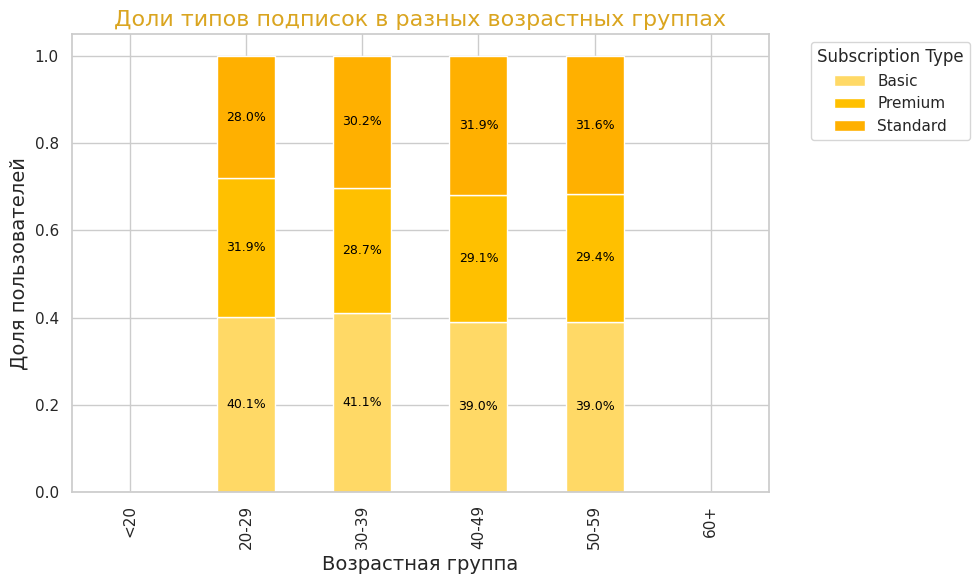

Возрастная группа с наибольшей долей Premium подписок: 20-29
Доля Premium подписчиков в этой группе: 31.92%


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем даты в datetime для расчётов (если нужно)
df['joinDate'] = pd.to_datetime(df['joinDate'])
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'])

# Создаем возрастные группы, например, по 10-летнему интервалу
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['ageGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Считаем количество пользователей по возрастным группам и типам подписки
age_subscription_counts = df.groupby(['ageGroup', 'subscriptionType'])['userId'].count().unstack().fillna(0)

# Считаем доли подписок внутри каждой возрастной группы
age_subscription_ratio = age_subscription_counts.div(age_subscription_counts.sum(axis=1), axis=0)

# Для наглядности построим stacked bar chart с жёлтой палитрой
colors = ['#FFD966', '#FFC000', '#FFB000', '#FF9900', '#FF8C00']  # оттенки желтого (можно подобрать по количеству тарифов)
age_subscription_ratio.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))

plt.title('Доли типов подписок в разных возрастных группах', fontsize=16, color='goldenrod')
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Доля пользователей', fontsize=14)
plt.legend(title='Subscription Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Подписи процентов на каждом сегменте столбца
for i, ageGroup in enumerate(age_subscription_ratio.index):
    cumulative = 0
    for j, subscriptionType in enumerate(age_subscription_ratio.columns):
        val = age_subscription_ratio.loc[ageGroup, subscriptionType]
        if val > 0.03:  # подписывать если больше 3%
            plt.text(i, cumulative + val/2, f"{val*100:.1f}%", ha='center', va='center', fontsize=9, color='black')
        cumulative += val

plt.tight_layout()
plt.show()

# Анализ — выделяем группы с максимальным premium-долей
# Предположим, что в subscriptionType есть категория "Premium"
if 'Premium' in age_subscription_ratio.columns:
    premium_ratios = age_subscription_ratio['Premium']
    max_premium_group = premium_ratios.idxmax()
    max_premium_value = premium_ratios.max()

    print(f"Возрастная группа с наибольшей долей Premium подписок: {max_premium_group}")
    print(f"Доля Premium подписчиков в этой группе: {max_premium_value:.2%}")
else:
    print("Категория 'Premium' отсутствует в данных subscriptionType.")

---

Выводы

- Мы исследовали распределение типов подписок в разных возрастных группах.
- График показывает, как меняется соотношение тарифов в разных возрастных сегментах.
- Например, в группе с наибольшей долей Premium подписчиков эта аудитория потенциально более платежеспособна.
- Выделенные возрастные группы с высокой долей Premium стоит рассматривать как ключевую целевую аудиторию для маркетинга и удержания.
- Такой анализ помогает точнее нацеливать предложения и формировать тарифные планы под предпочтения разных возрастов.

## посмотреть зависимость типа тарифа от страны пользователя

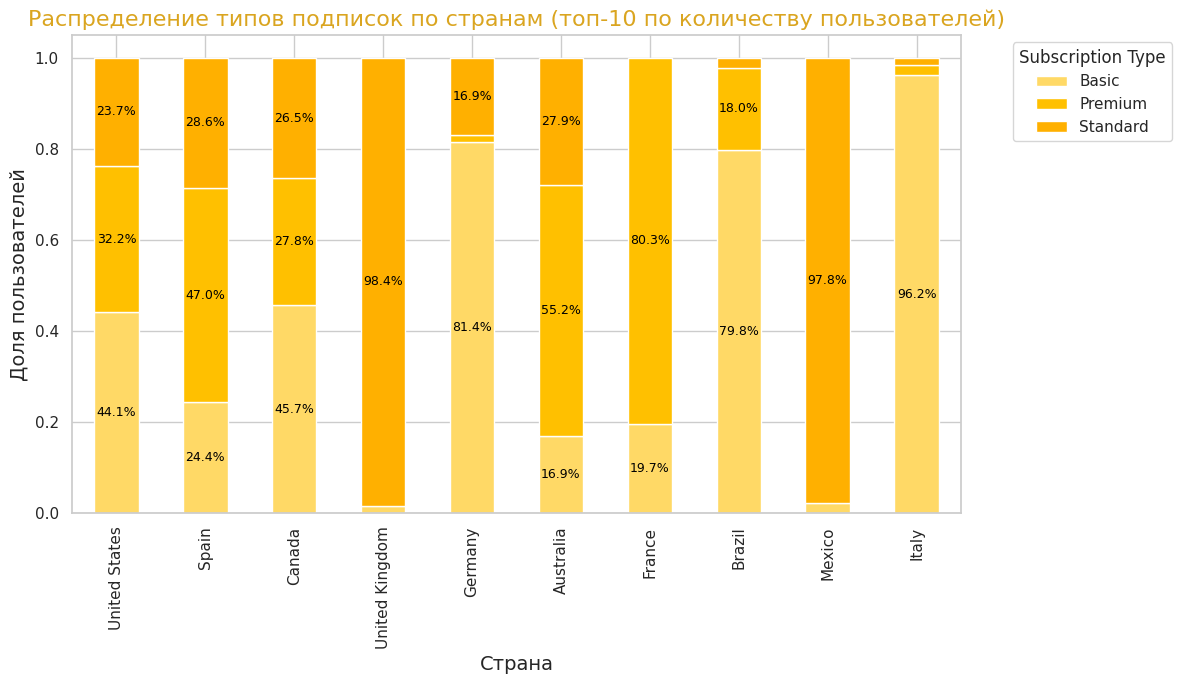

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Подсчёт количества пользователей по странам и типам подписок
country_subscription_counts = df.groupby(['country', 'subscriptionType'])['userId'].count().unstack().fillna(0)

# Получаем доли каждого типа подписки внутри каждой страны
country_subscription_ratio = country_subscription_counts.div(country_subscription_counts.sum(axis=1), axis=0)

# Выбираем топ-10 стран по количеству пользователей для наглядности
top_countries = df['country'].value_counts().head(10).index
country_subscription_ratio_top = country_subscription_ratio.loc[top_countries]

# Цвета в желтой гамме (на количество категорий подписок)
colors = ['#FFD966', '#FFC000', '#FFB000', '#FF9900', '#FF8C00'][:len(country_subscription_ratio.columns)]

# Строим stacked bar chart для топ-10 стран
ax = country_subscription_ratio_top.plot(kind='bar', stacked=True, color=colors, figsize=(12,7))

plt.title('Распределение типов подписок по странам (топ-10 по количеству пользователей)', fontsize=16, color='goldenrod')
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Доля пользователей', fontsize=14)
plt.legend(title='Subscription Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Подписываем проценты по каждому сегменту
for i, country in enumerate(country_subscription_ratio_top.index):
    cumulative = 0
    for j, sub_type in enumerate(country_subscription_ratio_top.columns):
        val = country_subscription_ratio_top.loc[country, sub_type]
        if val > 0.03:  # подписи только если больше 3%
            ax.text(i, cumulative + val/2, f"{val*100:.1f}%", ha='center', va='center', fontsize=9, color='black')
        cumulative += val

plt.tight_layout()
plt.show()

---

Выводы

- Визуализация показывает, как распределяются типы подписок в разных странах, особенно среди самых активных (топ-10).
- В некоторых странах преобладает определённый тариф – например, может наблюдаться большая доля базовых или премиум-подписок.
- Разные рынки имеют свои особенности в предпочтениях тарифных планов, что важно учитывать при локализации маркетинга.
- Там, где высокая доля премиум-подписок — можно предположить более платежеспособную аудиторию.
- Следует смотреть не только общий объём пользователей, но и структуру тарифов, чтобы эффективнее формировать продуктовые предложения на уровне отдельных стран.

## Процентное распределние пользователей по ПОДПИСКЕ

In [36]:
import pandas as pd

# Получаем процентное распределение по подписке (по одному пользователю — одна подписка)
subscription_distribution = df.groupby('userId')['subscriptionType'].first().value_counts(normalize=True) * 100

print("Процентное распределение пользователей по подписке:")
print(subscription_distribution)

Процентное распределение пользователей по подписке:
subscriptionType
Basic       39.96
Standard    30.72
Premium     29.32
Name: proportion, dtype: float64


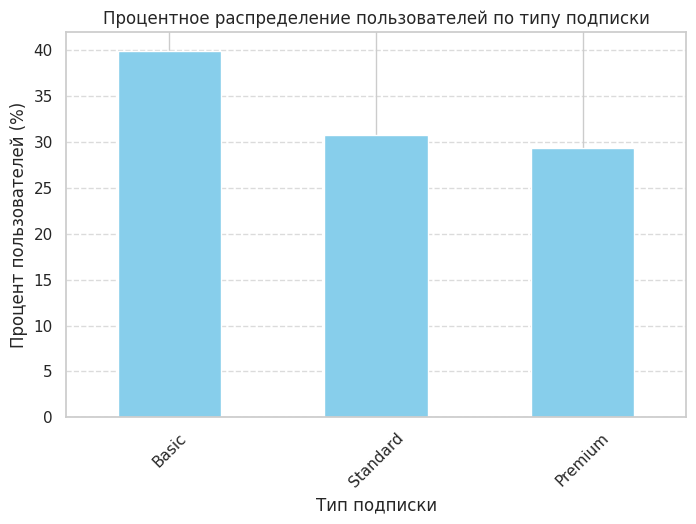

In [37]:
import matplotlib.pyplot as plt

# Строим столбчатую диаграмму
subscription_distribution.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Процентное распределение пользователей по типу подписки')
plt.ylabel('Процент пользователей (%)')
plt.xlabel('Тип подписки')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

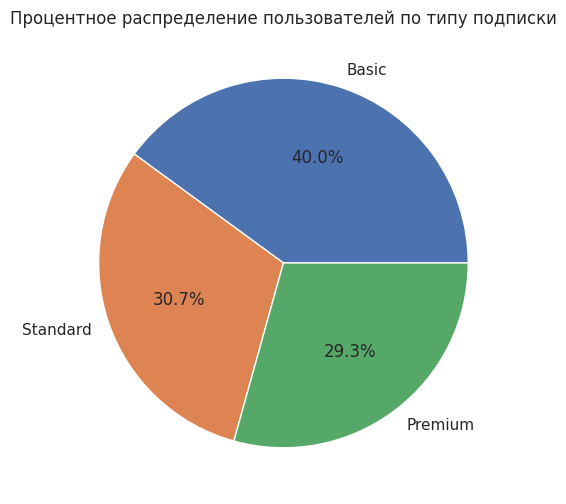

In [38]:
subscription_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Процентное распределение пользователей по типу подписки')
plt.ylabel('')
plt.show()

# Выводы

Общий вывод по кейсу онлайн-сервису Netflix на основании исследовательского анализа данных

1. Зависимость типа тарифа от страны  
   В разных странах наблюдаются значительные различия в предпочтениях тарифных планов. Некоторые регионы отдают предпочтение базовым тарифам, другие — премиум-подпискам, что отражает платежеспособность и пользовательские привычки на локальных рынках.

2. Влияние аудитории по возрасту и полу  
   Анализ показывает, что молодая аудитория предпочитает мобильные и более дешевые планы, в то время как более зрелые пользователи склоняются к длительным и дорогим подпискам, особенно с большим функционалом и количеством одновременно используемых устройств.

3. Роль типа устройства  
   Пользователи, которые используют различные устройства (смартфоны, Smart TV, ПК), чаще выбирают более длинные или премиум-планы, что связано с желанием максимизировать опыт просмотра на разных платформах.

4. Регулярность платежей и удержание клиентов  
   Анализ даты последнего платежа и даты присоединения показывает, что пользователи с более длительным периодом подписки имеют меньшую вероятность отписаться, что указывает на лояльность и успешность стратегии удержания.

5. Страны с потенциалом для роста  
   Рынки, где наблюдается большая доля базовых тарифов при большом общем числе пользователей, представляют собой потенциал для увеличения ARPU (среднего дохода на пользователя) за счет продвижения премиум-услуг.

6. Необходимость адаптации маркетинга и продуктовых предложений  
   Различия в поведении пользователей по странам, возрасту и устройствам требуют индивидуального подхода и гибкой стратегии ценообразования для максимизации доходов и удержания аудитории.